In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# [Quest 6]

### breast_cancer 데이터 셋을 사용하여

### (i)  radius 변수를 기준으로 breast cancer 양성/음성을 분류하는 로지스틱 회귀분석 모델을 만들기
### (ii) 시각화 하기
### (iii) radius 길이가 20, 0.1 일 때의 결과를 해석하기

In [2]:
from sklearn.datasets import load_breast_cancer

In [15]:
bc.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [4]:
bc.target_names # 0: malignant(양성), 1: benign(음성)

array(['malignant', 'benign'], dtype='<U9')

In [5]:
# 데이터프레임 만들어 보기
bc_DF = pd.DataFrame(bc.data, columns = bc.feature_names)
bc_DF['target'] = bc.target
bc_DF['target_str'] = bc_DF['target'].map({0:'malignant',1:'benign'}) 

In [6]:
bc_DF.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_str
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [7]:
bc_DF.shape

(569, 32)

In [8]:
bc_DF[['mean radius','target']].head(5) #필요한 데이터만 보기

,mean radius,target
0,17.99,0
1,20.57,0
2,19.69,0
3,11.42,0
4,20.29,0


## (i) radius 변수를 기준으로 breast cancer 양성/음성을 분류하는 로지스틱 회귀분석 모델을 만들기

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
X = bc['data']
y = bc['target']

In [11]:
X_radius = X[:, 0].reshape(-1,1) # mean radius 데이터 저장, model에 맞는 형태로 변환
y = (y==0).astype(np.int) # y==0 인경우 양성(1), y==1 인경우 음성(0)

In [12]:
log_reg = LogisticRegression() # LogisticRegrssion 객체 생성
log_reg.fit(X_radius,y) # 학습 수행

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## (ii) 시각화 하기

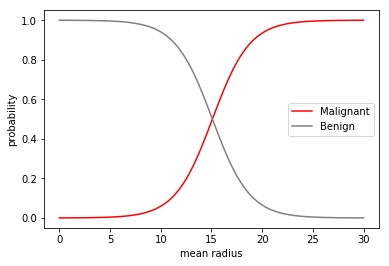

In [13]:
X_new = np.linspace(0, 30, 1000).reshape(-1,1) # mean radius 데이터 분포에 맞게 조정
y_prob = log_reg.predict_proba(X_new) # 예측 수행
plt.plot(X_new, y_prob[:,1], 'r-', label='Malignant') #양성일 확률
plt.plot(X_new, y_prob[:,0], 'gray', label='Benign') # 음성일 확률
plt.xlabel("mean radius")
plt.ylabel("probability")
plt.legend()
plt.show()

## (iii) radius 길이가 20, 0.1 일 때의 결과를 해석하기

In [14]:
log_reg.predict([[20.0], [0.1]])
# mean radius = 20 인 경우, 양성일 확률이 더 높다.
# mean raidus = 0.1 인 경우, 음성일 확률이 더 높다. 

array([1, 0])

 ### 해석: mean radius = 20 일때 양성. mean radius = 0.1 일 때 음성